In [1]:
import pymc3 as pm
import pandas as pd
import matplotlib.pyplot as plt
import fmax as fm
import numpy as np

# Some plotting functions

In [2]:
def plot_posterior_predictive(fcast_model, label, figsize=(13,8)):
    """Simple plot of the posterior predictive of a forecast model.
    """

    sample_paths = fcast_model.posterior_predictive_samples
    index = fcast_model.train_index

    # Calculate the 1%, 10%, 50%, 90%, and 99% quantiles
    lower_bound_one = np.quantile(sample_paths, q=0.01, axis=0)
    lower_bound_ten = np.quantile(sample_paths, q=0.1, axis=0)
    medians = np.quantile(sample_paths, q=0.5, axis=0)
    upper_bound_ninety = np.quantile(sample_paths, q=0.9, axis=0)
    upper_bound_ninety_nine = np.quantile(sample_paths, q=0.99, axis=0)

    # Plot
    fig, axs = plt.subplots(figsize=figsize)

    t_index = [1968+i for i in range(len(index))]

    axs.fill_between(t_index, lower_bound_one, upper_bound_ninety_nine, alpha=0.4, label="99% CI", color="C0")
    axs.fill_between(t_index, lower_bound_ten, upper_bound_ninety, alpha=0.7, label="80% CI", color="C0")
    axs.plot(t_index, medians, label="Median")
    axs.plot(t_index, fcast_model.train_data, color="red", label="Training")
    axs.legend()
    axs.set_xlabel("Year")
    axs.set_ylabel("Record (in seconds)")
    axs.set_title(label)

    fig.tight_layout()

    return fig

In [14]:
def plot_posterior_predictive_w_mean(fcast_model, label, figsize=(13,8)):
    """Simple plot of the posterior predictive of a forecast model.
    """

    sample_paths = fcast_model.posterior_predictive_samples
    index = fcast_model.train_index

    # Calculate the 1%, 10%, 50%, 90%, and 99% quantiles
    lower_bound_one = np.quantile(sample_paths, q=0.01, axis=0)
    lower_bound_ten = np.quantile(sample_paths, q=0.1, axis=0)
    medians = np.quantile(sample_paths, q=0.5, axis=0)
    upper_bound_ninety = np.quantile(sample_paths, q=0.9, axis=0)
    upper_bound_ninety_nine = np.quantile(sample_paths, q=0.99, axis=0)
    mean = np.mean(sample_paths, axis=0)

    # Plot
    fig, axs = plt.subplots(figsize=figsize)

    t_index = [1968+i for i in range(len(index))]

    axs.fill_between(t_index, lower_bound_one, upper_bound_ninety_nine, alpha=0.4, label="99% CI", color="C0")
    axs.fill_between(t_index, lower_bound_ten, upper_bound_ninety, alpha=0.7, label="80% CI", color="C0")
    axs.plot(t_index, medians, label="Median", color="blue")
    axs.plot(t_index, mean, label="Mean", color="purple")
    axs.plot(t_index, fcast_model.train_data, color="red", label="Training")
    axs.legend()
    axs.set_xlabel("Year")
    axs.set_ylabel("Record (in seconds)")
    axs.set_title(label)

    fig.tight_layout()

    return fig

In [4]:
def plot_forecast(fcast_model, test_data, label, actual, figsize=(13,8)):
    """Simple plot of the posterior predictive of a forecast model.
    """

    sample_paths = fcast_model.forecast_samples
    index = fcast_model.master_with_fcast_index

    # Calculate the 1%, 10%, 50%, 90%, and 99% quantiles
    lower_bound_one = np.quantile(sample_paths, q=0.025, axis=0)
    lower_bound_ten = np.quantile(sample_paths, q=0.16, axis=0)
    medians = np.quantile(sample_paths, q=0.5, axis=0)
    upper_bound_ninety = np.quantile(sample_paths, q=0.84, axis=0)
    upper_bound_ninety_nine = np.quantile(sample_paths, q=0.975, axis=0)

    # Plot
    fig, axs = plt.subplots(figsize=figsize)
        
    # axs.fill_between(index, lower_bound_one, upper_bound_ninety_nine, alpha=0.4, label="99% CI", color="C0")
    # axs.fill_between(index, lower_bound_ten, upper_bound_ninety, alpha=0.7, label="80% CI", color="C0")
    
    axs.fill_between(index, lower_bound_one, upper_bound_ninety_nine, alpha=0.4, label="95% CI", color="C0")
    axs.fill_between(index, lower_bound_ten, upper_bound_ninety, alpha=0.7, label="68% CI", color="C0")
    
    axs.plot(index, medians, label="Median")
    axs.plot(fcast_model.train_index, fcast_model.train_data, color="red", label="Training")
    axs.plot(fcast_model.fcast_index, test_data, color="black", label="Tryfos")
    axs.plot(fcast_model.fcast_index, actual, color="green", label="Actual")
    axs.legend()
    axs.set_xlabel("Year")
    axs.set_ylabel("Record (in seconds)")
    axs.set_title(label)

    fig.tight_layout()

    return fig

In [5]:
def plot_forecast_w_mean(fcast_model, test_data, label, actual, figsize=(13,8)):
    """Simple plot of the posterior predictive of a forecast model.
    """

    sample_paths = fcast_model.forecast_samples
    index = fcast_model.master_with_fcast_index

    # Calculate the 1%, 10%, 50%, 90%, and 99% quantiles
    lower_bound_one = np.quantile(sample_paths, q=0.025, axis=0)
    lower_bound_ten = np.quantile(sample_paths, q=0.16, axis=0)
    medians = np.quantile(sample_paths, q=0.5, axis=0)
    upper_bound_ninety = np.quantile(sample_paths, q=0.84, axis=0)
    upper_bound_ninety_nine = np.quantile(sample_paths, q=0.975, axis=0)
    mean = np.mean(sample_paths, axis=0)

    # Plot
    fig, axs = plt.subplots(figsize=figsize)
        
    # axs.fill_between(index, lower_bound_one, upper_bound_ninety_nine, alpha=0.4, label="99% CI", color="C0")
    # axs.fill_between(index, lower_bound_ten, upper_bound_ninety, alpha=0.7, label="80% CI", color="C0")
    
    axs.fill_between(index, lower_bound_one, upper_bound_ninety_nine, alpha=0.4, label="95% CI", color="C0")
    axs.fill_between(index, lower_bound_ten, upper_bound_ninety, alpha=0.7, label="68% CI", color="C0")
    
    axs.plot(index, medians, label="Median")
    axs.plot(index, mean, label="Mean")
    axs.plot(fcast_model.train_index, fcast_model.train_data, color="red", label="Training")
    axs.plot(fcast_model.fcast_index, test_data, color="black", label="Tryfos")
    axs.plot(fcast_model.fcast_index, actual, color="green", label="Actual")
    axs.legend()
    axs.set_xlabel("Year")
    axs.set_ylabel("Record (in seconds)")
    axs.set_title(label)

    fig.tight_layout()

    return fig

In [6]:
def plot_forecast_fin(fcast_model, test_data, label, actual, figsize=(13,8)):
    """Simple plot of the posterior predictive of a forecast model.
    """

    sample_paths = fcast_model.forecast_samples
    index = fcast_model.master_with_fcast_index

    # Convert to the actual years
    index = [1968+i for i in range(len(index))]

    # Calculate the 1%, 10%, 50%, 90%, and 99% quantiles
    lower_bound_one = np.quantile(sample_paths, q=0.025, axis=0)
    lower_bound_ten = np.quantile(sample_paths, q=0.16, axis=0)
    medians = np.quantile(sample_paths, q=0.5, axis=0)
    upper_bound_ninety = np.quantile(sample_paths, q=0.84, axis=0)
    upper_bound_ninety_nine = np.quantile(sample_paths, q=0.975, axis=0)

    # Plot
    fig, axs = plt.subplots(figsize=figsize)
    
    axs.fill_between(index, lower_bound_one, upper_bound_ninety_nine, alpha=0.4, label="95% CI", color="C0")
    axs.fill_between(index, lower_bound_ten, upper_bound_ninety, alpha=0.7, label="68% CI", color="C0")
    axs.plot(index, medians, label="Median", color="blue")
    axs.plot([1968+i for i in range(len(fcast_model.train_index))], fcast_model.train_data, color="green", label="Training")
    axs.plot([1983+i for i in range(len(fcast_model.fcast_index))], test_data, color="black", label="Tryfos")
    axs.plot([1983+i for i in range(len(fcast_model.fcast_index))], actual, color="red", label="Actual")
    axs.legend()
    axs.set_xlabel("Year")
    axs.set_ylabel("Record (in seconds)")
    axs.set_title(label)

    fig.tight_layout()

    return fig

In [7]:
def plot_forecast_fin_w_mean(fcast_model, test_data, label, actual, figsize=(13,8)):
    """Simple plot of the posterior predictive of a forecast model.
    """

    sample_paths = fcast_model.forecast_samples
    index = fcast_model.master_with_fcast_index

    # Convert to the actual years
    index = [1968+i for i in range(len(index))]

    # Calculate the 1%, 10%, 50%, 90%, and 99% quantiles
    lower_bound_one = np.quantile(sample_paths, q=0.025, axis=0)
    lower_bound_ten = np.quantile(sample_paths, q=0.16, axis=0)
    medians = np.quantile(sample_paths, q=0.5, axis=0)
    upper_bound_ninety = np.quantile(sample_paths, q=0.84, axis=0)
    upper_bound_ninety_nine = np.quantile(sample_paths, q=0.975, axis=0)
    mean = np.mean(sample_paths, axis=0)

    # Plot
    fig, axs = plt.subplots(figsize=figsize)
    
    axs.fill_between(index, lower_bound_one, upper_bound_ninety_nine, alpha=0.4, label="95% CI", color="C0")
    axs.fill_between(index, lower_bound_ten, upper_bound_ninety, alpha=0.7, label="68% CI", color="C0")
    axs.plot(index, medians, label="Median", color="blue")
    axs.plot(index, mean, label="Mean", color="purple")
    axs.plot([1968+i for i in range(len(fcast_model.train_index))], fcast_model.train_data, color="green", label="Training")
    axs.plot([1983+i for i in range(len(fcast_model.fcast_index))], test_data, color="black", label="Tryfos")
    axs.plot([1983+i for i in range(len(fcast_model.fcast_index))], actual, color="red", label="Actual")
    axs.legend()
    axs.set_xlabel("Year")
    axs.set_ylabel("Record (in seconds)")
    axs.set_title(label)

    fig.tight_layout()

    return fig

In [8]:
def plot_forecast_small(fcast_model, test_data, label, actual):
    """Simple plot of the posterior predictive of a forecast model.
    """

    sample_paths = fcast_model.forecast_samples
    index = fcast_model.master_with_fcast_index

    # Convert to the actual years
    index = [1968+i for i in range(len(index))]

    # Calculate the 1%, 10%, 50%, 90%, and 99% quantiles
    lower_bound_one = np.quantile(sample_paths, q=0.025, axis=0)
    lower_bound_ten = np.quantile(sample_paths, q=0.16, axis=0)
    medians = np.quantile(sample_paths, q=0.5, axis=0)
    upper_bound_ninety = np.quantile(sample_paths, q=0.84, axis=0)
    upper_bound_ninety_nine = np.quantile(sample_paths, q=0.975, axis=0)

    # Plot
    fig, axs = plt.subplots(figsize=(8,5))
    
    axs.fill_between(index, lower_bound_one, upper_bound_ninety_nine, alpha=0.4, label="95% CI", color="C0")
    axs.fill_between(index, lower_bound_ten, upper_bound_ninety, alpha=0.7, label="68% CI", color="C0")
    axs.plot(index, medians, label="Median", color="blue")
    axs.plot([1968+i for i in range(len(fcast_model.train_index))], fcast_model.train_data, color="green", label="Training")
    axs.plot([1983+i for i in range(len(fcast_model.fcast_index))], test_data, color="black", label="Tryfos")
    axs.plot([1983+i for i in range(len(fcast_model.fcast_index))], actual, color="red", label="Actual")
    axs.legend()
    #axs.set_xlabel("Period")
    #axs.set_ylabel("Record")
    #axs.set_title(label)

    fig.tight_layout()

    return fig

# Results for Gaussian

WARNING (theano.tensor.opt): Optimization Warning: The Op erfcx does not provide a C implementation. As well as being potentially slow, this also disables loop fusion.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (10 chains in 1 job)
NUTS: [sigma, mu]


Sampling 10 chains for 5_000 tune and 5_000 draw iterations (50_000 + 50_000 draws total) took 142 seconds.
There were 15 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.8757633807043727, but should be close to 0.99. Try to increase the number of tuning steps.
There were 15 divergences after tuning. Increase `target_accept` or reparameterize.
There were 15 divergences after tuning. Increase `target_accept` or reparameterize.
There were 15 divergences after tuning. Increase `target_accept` or reparameterize.
There were 15 divergences after tuning. Increase `target_accept` or reparameterize.
There were 15 divergences after tuning. Increase `target_accept` or reparameterize.
There were 15 divergences after tuning. Increase `target_accept` or reparameterize.
There were 15 divergences after tuning. Increase `target_accept` or reparameterize.
There were 15 divergences after tuning. Increase `target_accept` or

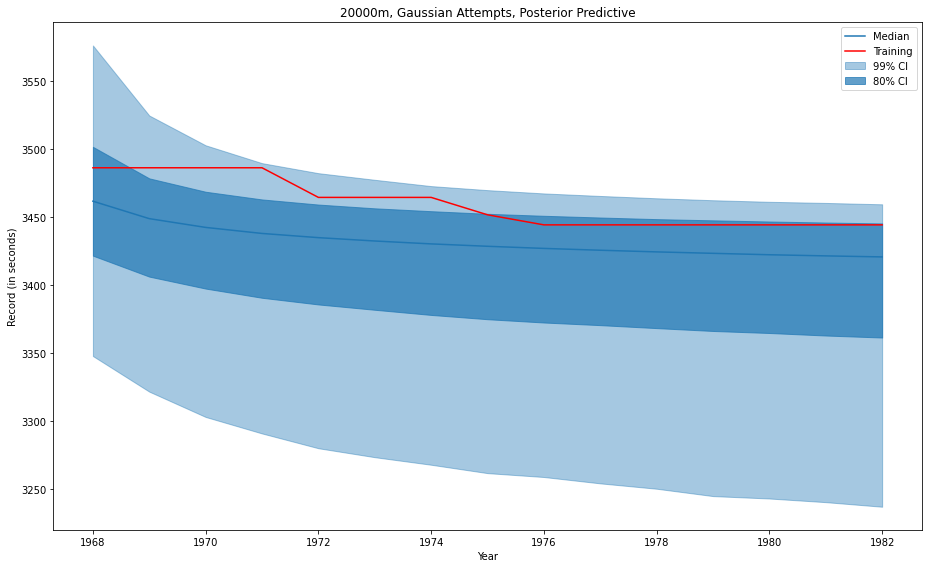

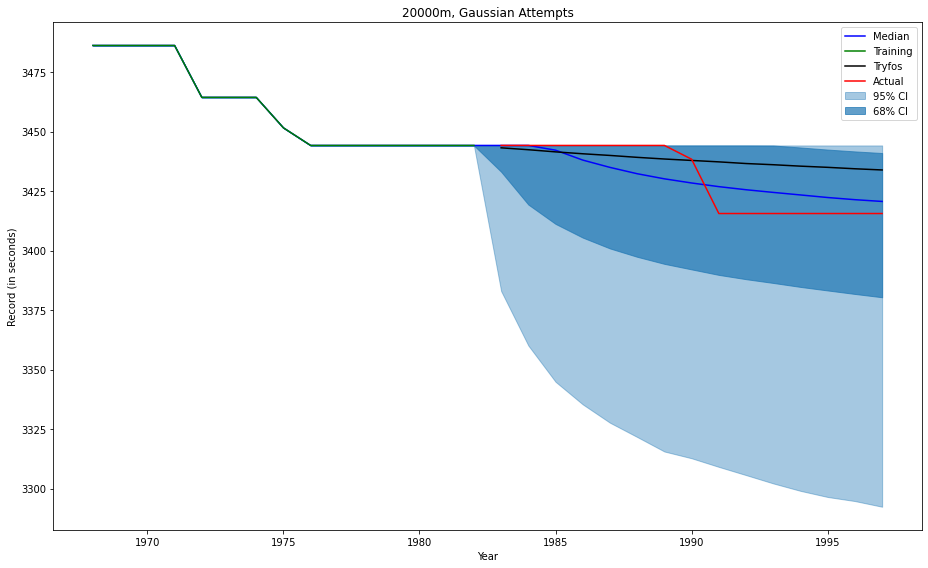

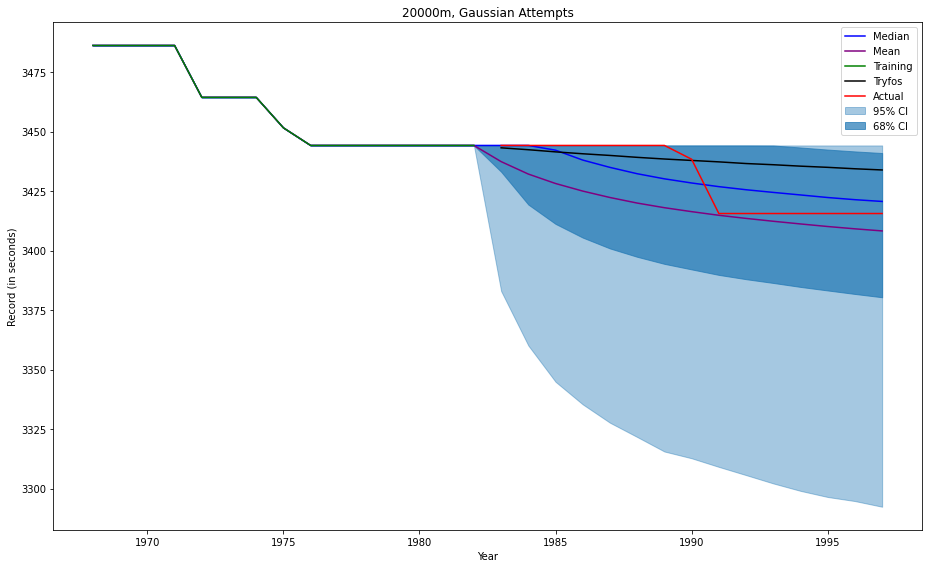

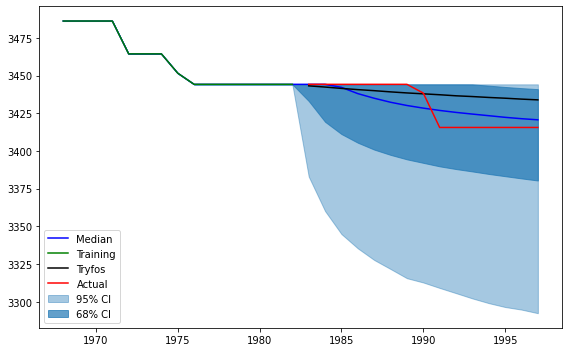

In [9]:
#whiches = ["1000m", "1m", "5000m", "Marathon", "10000m", "20000m"]
#whiches = ['20000m']
#whiches = ["1000m", "1m", "5000m", "Marathon", "10000m", "20000m"]
whiches = ["20000m"]
#whiches = ["1000m", "1m", "5000m", "Marathon"]
#whiches = ["1000m"]
#whiches = ["1000m"]
#whiches = ['1m']
#whiches = ['Marathon']

mses = {}
avg_log_probs = {}

fails = []

for which in whiches:
  try:
    df = pd.read_csv("tryfos_data.csv")
    years, records = df["Year"].values, df[which].values # Years 1983 and onward are just forecasts

    actual_df = pd.read_csv("tryfos_actual.csv")
    _, actual_records = actual_df["Year"].values, actual_df[which].values

    training_years = years[:15]
    training_records = records[:15]
    tryfos_years = years[15:]
    tryfos_fcast = records[15:]

    prior_parameters = {
              'mu' : {
                'mean' : training_records[0],
                'std' : 100*training_records[0],
              },
              'sigma' : {
                'lam' : 1/100
              }
            }

    model = fm.ForecastModel(training_records, prior_parameters=prior_parameters, attempt_distribution="gaussian", 
                                kind="min", train='all', fcast_len=len(tryfos_fcast), fcast_test_data=actual_records)
                                
    model.fit(chains=10, draws=5000)
    model.posterior_predictive()
    model.forecast()

    # MSE calculation
    median = np.quantile(model.forecast_samples[:,-15:], q=0.5, axis=0)
    mean = np.mean(model.forecast_samples[:,-15:], axis=0)
    bayes_mse = fm.mse(median, model.fcast_test_data)
    tryfos_mse = fm.mse(tryfos_fcast, model.fcast_test_data)
    baseline_fcast = training_records[-1]*np.ones_like(model.fcast_test_data)
    baseline_mse = fm.mse(baseline_fcast, model.fcast_test_data)
    bayes_mean_mse = fm.mse(mean, model.fcast_test_data)
    mses[which] = (bayes_mse, tryfos_mse, baseline_mse, bayes_mean_mse)

    # Average logp
    avg_log_probs[which] = np.mean(model.posterior_predictive_ppc["log_like_holdout"])


    # Plots
    fig = plot_posterior_predictive(model, f"{which}, Gaussian Attempts, Posterior Predictive")
    fig.savefig(f"flat_priors/gaussian/{which}_gaussian_attempts_post_pred.png")

    # fig = plot_forecast(model, tryfos_fcast, f"{which}, Gaussian Attempts, Forecast", actual_records)
    # fig.savefig(f"{which}_gaussian_attempts_forecast.png")

    fig = plot_forecast_fin(model, tryfos_fcast, f"{which}, Gaussian Attempts", actual_records)
    fig.savefig(f"flat_priors/gaussian/final_{which}_gaussian_attempts_forecast.png")

    fig = plot_forecast_fin_w_mean(model, tryfos_fcast, f"{which}, Gaussian Attempts", actual_records)
    fig.savefig(f"flat_priors/gaussian/final_{which}_gaussian_attempts_forecast_with_mean.png")

    fig = plot_forecast_small(model, tryfos_fcast, f"{which}, Gaussian Attempts", actual_records)
    fig.savefig(f"flat_priors/gaussian/s_final_{which}_gaussian_attempts_forecast.png")


  except:
    print(f"failed for {which}")
    fails.append(which)

In [ ]:
(bayes_mse, tryfos_mse, baseline_mse, bayes_mean_mse)

In [10]:
mses

{'20000m': (69.06851893937687,
  192.80000000000183,
  383.95733333333067,
  213.79066953070455)}

In [11]:
avg_log_probs

{'20000m': -16.2887121426851}

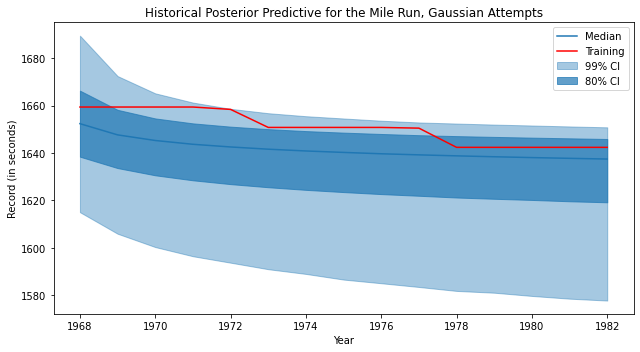

In [12]:
fig = plot_posterior_predictive(model, f"Historical Posterior Predictive for the Mile Run, Gaussian Attempts", figsize=(9,5))
fig.savefig(f"flat_priors/article_gaussian_attempts_post_pred_mile_run.png")

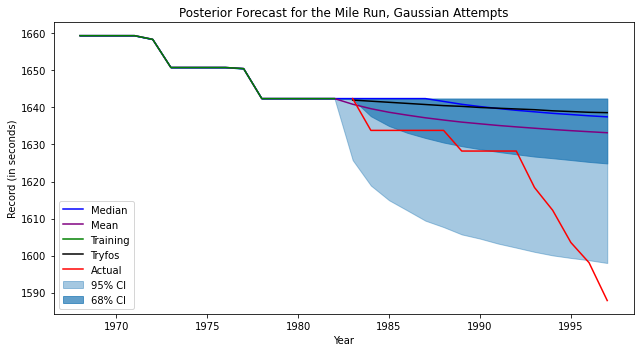

In [13]:
fig = plot_forecast_fin_w_mean(model, tryfos_fcast, f"Posterior Forecast for the Mile Run, Gaussian Attempts", actual_records, figsize=(9,5))
fig.savefig(f"flat_priors/article_gaussian_attempts_fcast_mile_run.png")

C:\Users\Jonathan\AppData\Local\Temp/ipykernel_38040/1110133197.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


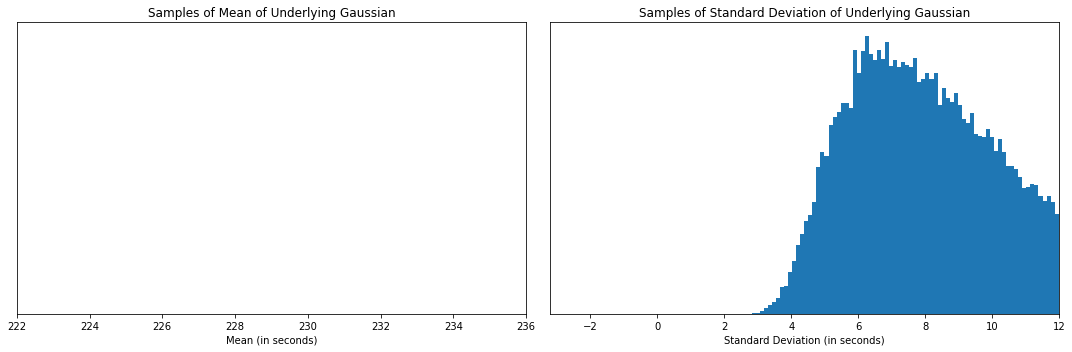

In [14]:
fig, axs = plt.subplots(1,2,figsize=(15,5))

axs[0].hist(model.trace.posterior.mu.values.flatten(), bins=1000)
axs[0].set_title('Samples of Mean of Underlying Gaussian')
axs[0].set_xlabel('Mean (in seconds)')
axs[0].set_yticks([])
axs[0].set_xlim(222, 236)

axs[1].hist(model.trace.posterior.sigma.values.flatten(), bins=1000)
axs[1].set_title('Samples of Standard Deviation of Underlying Gaussian')
axs[1].set_xlabel('Standard Deviation (in seconds)')
axs[1].set_yticks([])
axs[1].set_xlim(None,12)

fig.tight_layout()

fig.savefig(f"flat_priors/article_gaussian_attempts_posterior_hist.png")

fig.show()

In [82]:
import arviz as az

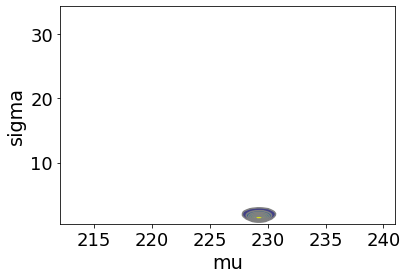

In [88]:
az.plot_pair(model.trace,
            kind='kde',
            var_names=['mu', 'sigma'],
            backend_kwargs
            textsize=18)
    
plt.show()

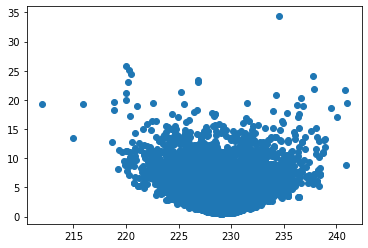

In [81]:
plt.scatter([model.trace.posterior.mu.values.flatten()], model.trace.posterior.sigma.values.flatten())

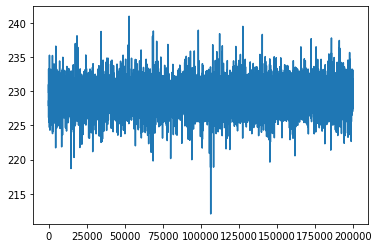

In [73]:
plt.plot(model.trace.posterior.mu.values.flatten())

# Gumbel

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (5 chains in 1 job)
NUTS: [sigma, mu]


Sampling 5 chains for 5_000 tune and 5_000 draw iterations (25_000 + 25_000 draws total) took 83 seconds.
There were 212 divergences after tuning. Increase `target_accept` or reparameterize.
There were 452 divergences after tuning. Increase `target_accept` or reparameterize.
There were 644 divergences after tuning. Increase `target_accept` or reparameterize.
There were 890 divergences after tuning. Increase `target_accept` or reparameterize.
There were 1122 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


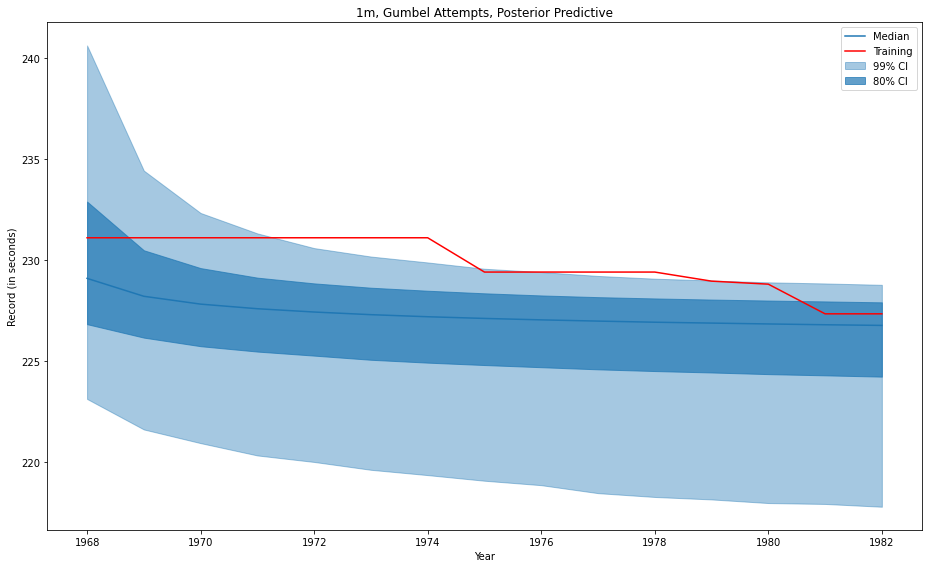

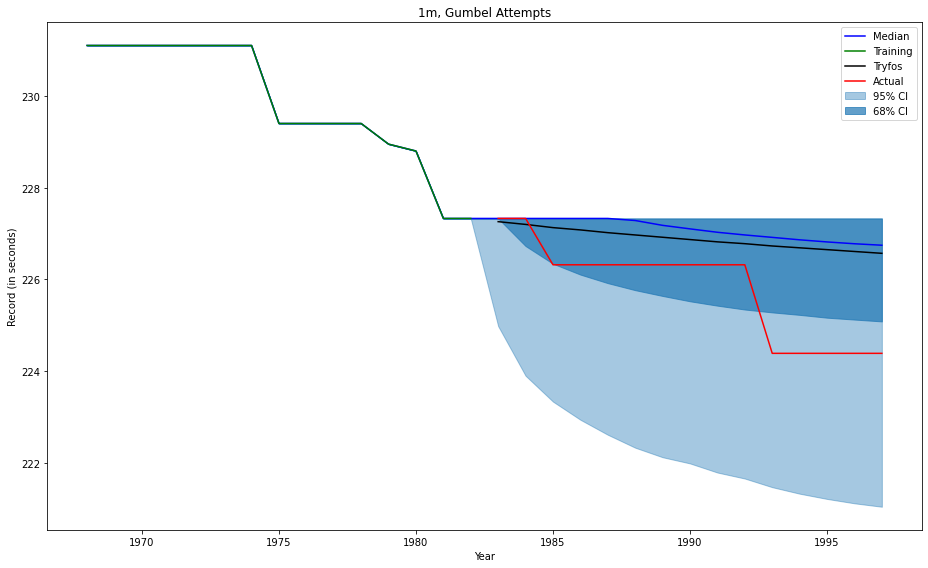

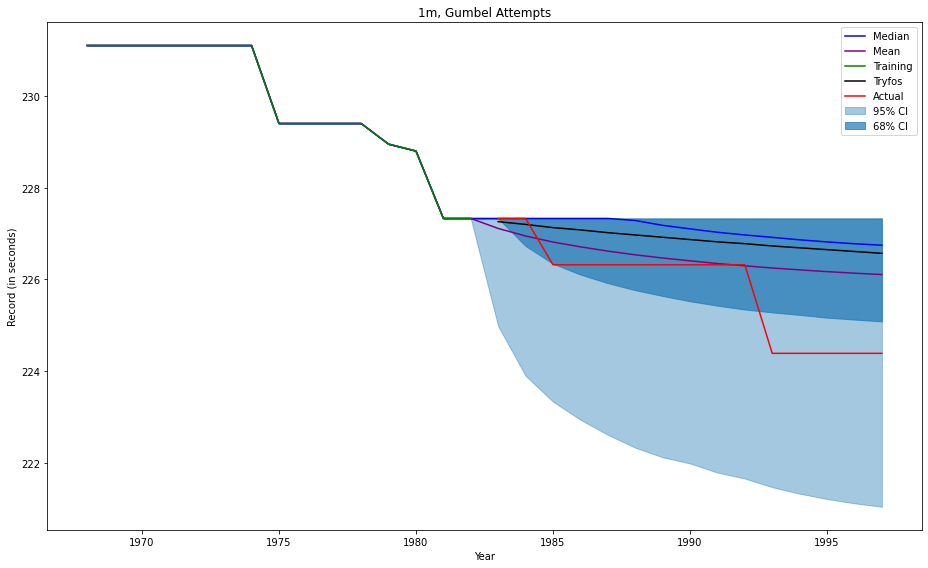

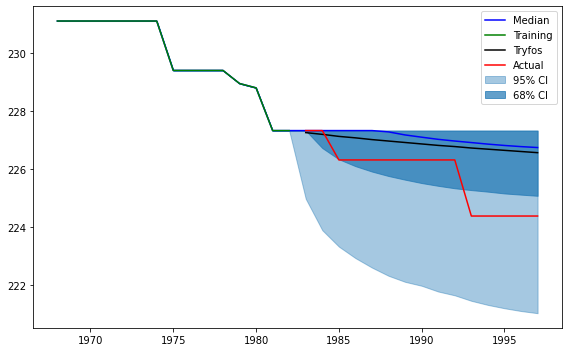

In [11]:
#whiches = ["1m", "5000m", "10000m", "Marathon"]
#whiches = ["1000m", "1m", "5000m", "Marathon", "10000m", "20000m"]
whiches = ["1m"]
#whiches = []

#whiches = ["20000m"]


mses = {}
avg_log_probs = {}

fails = []

#whiches = ["1000m"]
for which in whiches:

    try:

        df = pd.read_csv("tryfos_data.csv")
        years, records = df["Year"].values, df[which].values # Years 1983 and onward are just forecasts

        training_years = years[:15]
        training_records = records[:15]
        tryfos_years = years[15:]
        tryfos_fcast = records[15:]

        actual_df = pd.read_csv("tryfos_actual.csv")
        _, actual_records = actual_df["Year"].values, actual_df[which].values

        prior_parameters = {
                'mu' : {
                    'mean' : training_records[0],
                    'std' : 100*training_records[0],
                },
                'sigma' : {
                    'lam' : 1/100
                }
            }

        model = fm.ForecastModel(training_records, prior_parameters=prior_parameters, attempt_distribution="gumbel", 
                                    kind="min", train='all', fcast_len=len(tryfos_fcast), fcast_test_data=actual_records)
        
        model.fit(chains=5, draws=5000)
        model.posterior_predictive()
        model.forecast()


        # MSE calculation
        median = np.quantile(model.forecast_samples[:,-15:], q=0.5, axis=0)
        mean = np.mean(model.forecast_samples[:,-15:], axis=0)
        bayes_mse = fm.mse(median, model.fcast_test_data)
        tryfos_mse = fm.mse(tryfos_fcast, model.fcast_test_data)
        baseline_fcast = training_records[-1]*np.ones_like(model.fcast_test_data)
        baseline_mse = fm.mse(baseline_fcast, model.fcast_test_data)
        bayes_mean_mse = fm.mse(mean, model.fcast_test_data)
        mses[which] = (bayes_mse, tryfos_mse, baseline_mse, bayes_mean_mse)

        # Average logp
        avg_log_probs[which] = np.mean(model.posterior_predictive_ppc["log_like_holdout"])

        # Plots
        fig = plot_posterior_predictive(model, f"{which}, Gumbel Attempts, Posterior Predictive")
        fig.savefig(f"flat_priors/gumbel/final_{which}_gumbel_attempts_post_pred.png")

        # fig = plot_forecast(model, tryfos_fcast, f"{which}, Gumbel Attempts, Forecast", actual_records)
        # fig.savefig(f"{which}_gumbel_attempts_forecast.png")

        fig = plot_forecast_fin(model, tryfos_fcast, f"{which}, Gumbel Attempts", actual_records)
        fig.savefig(f"flat_priors/gumbel/final_{which}_gumbel_attempts_forecast.png")

        fig = plot_forecast_fin_w_mean(model, tryfos_fcast, f"{which}, Gumbel Attempts", actual_records)
        fig.savefig(f"flat_priors/gumbel/final_{which}_gumbel_attempts_forecast_w_mean.png")

        fig = plot_forecast_small(model, tryfos_fcast, f"{which}, Gumbel Attempts", actual_records)
        fig.savefig(f"flat_priors/gumbel/s_final_{which}_gumbel_attempts_forecast.png")



    except:
       print(f"Error: failed on {which}")
       fails.append(which)

In [13]:
mses[which] = (bayes_mse, tryfos_mse, baseline_mse, bayes_mean_mse)

In [14]:
mses

{'20000m': (144.73531205738468,
  192.80000000000183,
  383.95733333333067,
  108.63955313091103)}

In [15]:
avg_log_probs

{'20000m': -21.031171101094674}

In [17]:
model.trace.posterior.mu

<xarray.DataArray 'mu' (chain: 5, draw: 5000)>
array([[228.6530983 , 230.19726733, 229.38979575, ..., 228.18229123,
        230.26931037, 228.62152578],
       [228.53349915, 229.48758338, 229.7867988 , ..., 228.9799552 ,
        229.31469054, 229.70037336],
       [230.64575292, 230.27543584, 229.38343836, ..., 229.36965016,
        229.01866927, 229.1423224 ],
       [230.57581865, 230.4684452 , 230.27934863, ..., 228.94886253,
        228.94385882, 229.79947389],
       [230.23558359, 230.84950732, 228.06478371, ..., 228.43154942,
        229.38552366, 230.26343829]])
Coordinates:
  * chain    (chain) int32 0 1 2 3 4
  * draw     (draw) int32 0 1 2 3 4 5 6 7 ... 4993 4994 4995 4996 4997 4998 4999

C:\Users\Jonathan\AppData\Local\Temp/ipykernel_58856/2650985132.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


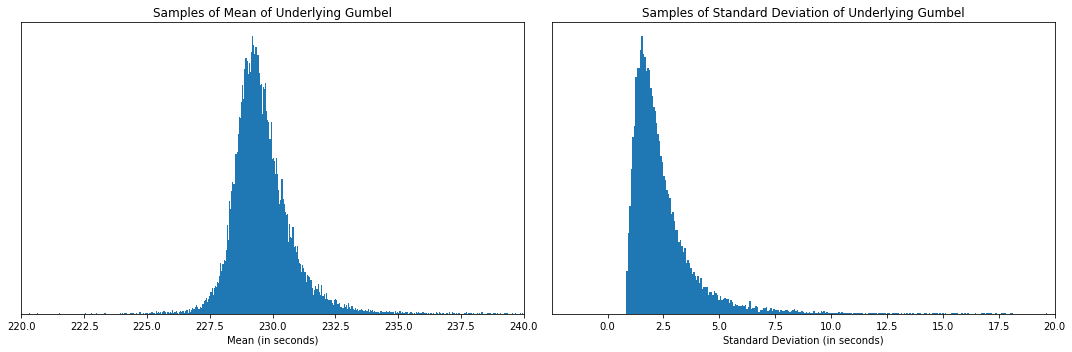

In [20]:
fig, axs = plt.subplots(1,2,figsize=(15,5))

axs[0].hist(model.trace.posterior.mu.values.flatten(), bins=1000)
axs[0].set_title('Samples of Mean of Underlying Gumbel')
axs[0].set_xlabel('Mean (in seconds)')
axs[0].set_yticks([])
axs[0].set_xlim(220, 240)

axs[1].hist(model.trace.posterior.sigma.values.flatten(), bins=1000)
axs[1].set_title('Samples of Standard Deviation of Underlying Gumbel')
axs[1].set_xlabel('Standard Deviation (in seconds)')
axs[1].set_yticks([])
axs[1].set_xlim(None,20)

fig.tight_layout()

fig.savefig(f"flat_priors/article_gumbel_attempts_posterior_hist.png")

fig.show()

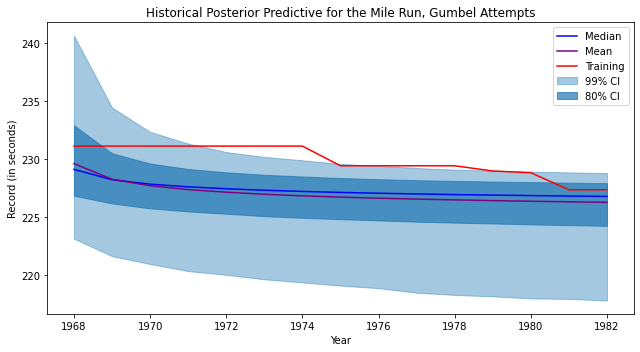

In [15]:
fig = plot_posterior_predictive_w_mean(model, f"Historical Posterior Predictive for the Mile Run, Gumbel Attempts", figsize=(9,5))
fig.savefig(f"flat_priors/article_gumbel_attempts_post_pred_mile_run.png")

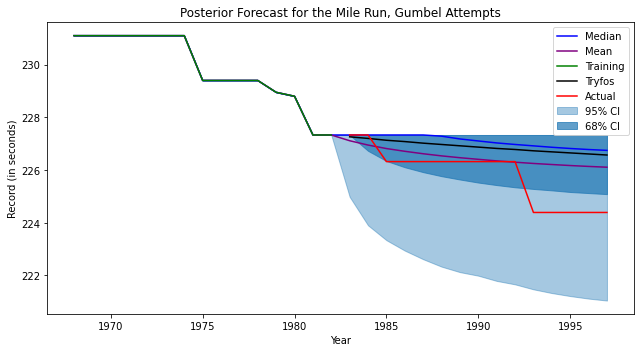

In [13]:
fig = plot_forecast_fin_w_mean(model, tryfos_fcast, f"Posterior Forecast for the Mile Run, Gumbel Attempts", actual_records, figsize=(9,5))
fig.savefig(f"flat_priors/article_gumbel_attempts_fcast_mile_run.png")

# Weibull

In [ ]:
model = fm.WeibullForecastModel(training_records, prior_parameters=prior_parameters, attempt_distribution="weibull", 
                            kind="min", train='all', fcast_len=len(tryfos_fcast), fcast_test_data=actual_records)
model.fit(chains=1, draws=10000, tune=3000)
model.posterior_predictive()
model.forecast()

# Weibull

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (10 chains in 1 job)
NUTS: [beta, alpha]


Sampling 10 chains for 5_000 tune and 5_000 draw iterations (50_000 + 50_000 draws total) took 218 seconds.
The number of effective samples is smaller than 25% for some parameters.


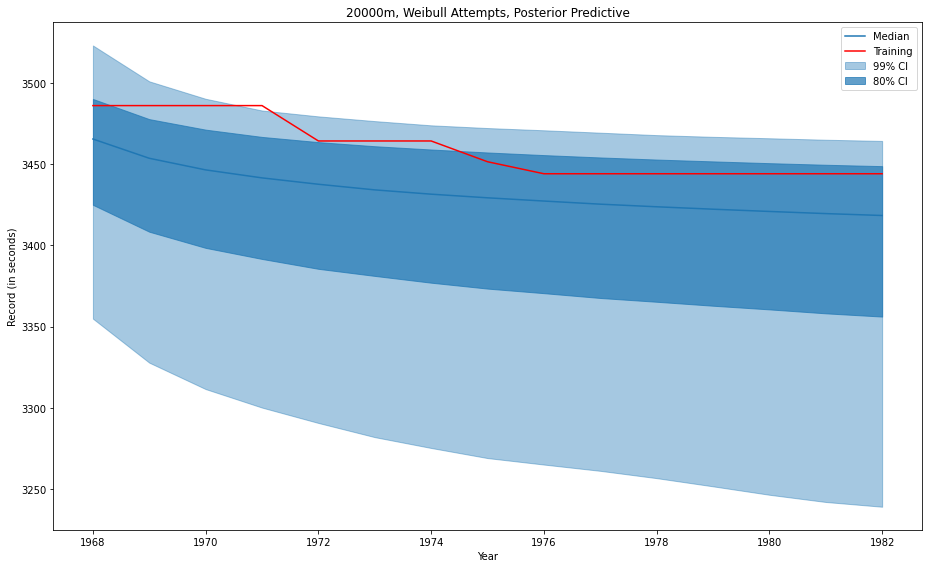

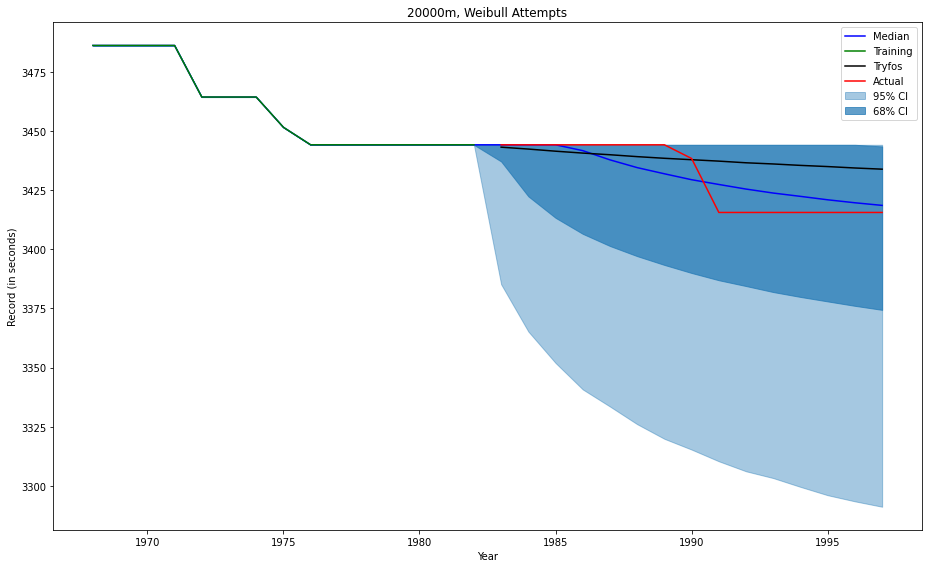

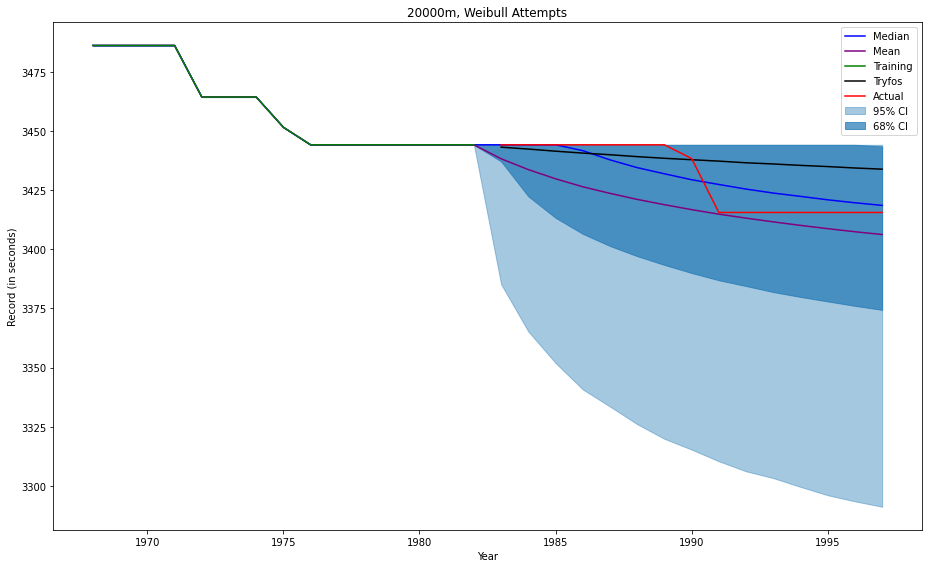

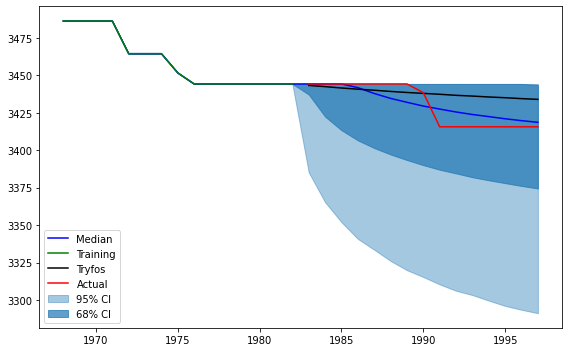

In [16]:
#whiches = ["1m", "5000m", "10000m", "Marathon"]
#whiches = ["1000m", "1m", "5000m", "Marathon", "10000m", "20000m"]
#whiches = []
whiches = ["20000m"]


msesw = {}
avg_log_probsw = {}

fails = []

#whiches = ["1000m"]
for which in whiches:

    try:

        df = pd.read_csv("tryfos_data.csv")
        years, records = df["Year"].values, df[which].values # Years 1983 and onward are just forecasts

        training_years = years[:15]
        training_records = records[:15]
        tryfos_years = years[15:]
        tryfos_fcast = records[15:]

        actual_df = pd.read_csv("tryfos_actual.csv")
        _, actual_records = actual_df["Year"].values, actual_df[which].values

        prior_parameters = {
        'alpha' : {
            'lower' : 1e-5,
            'upper' : 10e4,
        },
        'beta' : {
            'lower' : 1e-5,
            'upper': 10e4,
            }
        }

        model = fm.WeibullForecastModel(training_records, prior_parameters=prior_parameters, attempt_distribution="weibull", 
                            kind="min", train='all', fcast_len=len(tryfos_fcast), fcast_test_data=actual_records)


        model.fit(chains=10, draws=5000)
        model.posterior_predictive()
        model.forecast()


        # MSE calculation
        median = np.quantile(model.forecast_samples[:,-15:], q=0.5, axis=0)
        mean = np.mean(model.forecast_samples[:,-15:], axis=0)
        bayes_mse = fm.mse(median, model.fcast_test_data)
        tryfos_mse = fm.mse(tryfos_fcast, model.fcast_test_data)
        baseline_fcast = training_records[-1]*np.ones_like(model.fcast_test_data)
        baseline_mse = fm.mse(baseline_fcast, model.fcast_test_data)
        bayes_mean_mse = fm.mse(mean, model.fcast_test_data)
        mses[which] = (bayes_mse, tryfos_mse, baseline_mse, bayes_mean_mse)

        # Average logp
        avg_log_probsw[which] = np.mean(model.posterior_predictive_ppc["log_like_holdout"])

        # Plots
        fig = plot_posterior_predictive(model, f"{which}, Weibull Attempts, Posterior Predictive")
        fig.savefig(f"weibull/final_{which}_weibull_attempts_post_pred.png")

        # fig = plot_forecast(model, tryfos_fcast, f"{which}, Gumbel Attempts, Forecast", actual_records)
        # fig.savefig(f"{which}_gumbel_attempts_forecast.png")

        fig = plot_forecast_fin(model, tryfos_fcast, f"{which}, Weibull Attempts", actual_records)
        fig.savefig(f"flat_priors/weibull/final_{which}_weibull_attempts_forecast.png")

        fig = plot_forecast_fin_w_mean(model, tryfos_fcast, f"{which}, Weibull Attempts", actual_records)
        fig.savefig(f"flat_priors/weibull/final_{which}_weibull_attempts_forecast_w_mean.png")

        fig = plot_forecast_small(model, tryfos_fcast, f"{which}, Weibull Attempts", actual_records)
        fig.savefig(f"flat_priors/weibull/s_final_{which}_weibull_attempts_forecast.png")



    except:
       print(f"Error: failed on {which}")
       fails.append(which)

In [17]:
mses

{'20000m': (51.70339402571368,
  192.80000000000183,
  383.95733333333067,
  198.68438073682924)}

In [18]:
avg_log_probsw

{'20000m': -16.480539229265105}

In [19]:
msesw

{}

In [20]:
avg_log_probsw

{'20000m': -16.480539229265105}